# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

677

In [12]:
#created this for verification of names
# city_df = pd.DataFrame(cities)
# city_df

,0
0,kapaa
1,kenai
2,mantua
3,petropavlovsk-kamchatskiy
4,araouane
...,...
672,lillers
673,stoyba
674,north ogden
675,yala


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
#Build the query URL for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" #getting data in celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#define empty lists to hold data and later convert to dataframe
city_name = []
lat = []
lng = []
max_temp = []
humid = []
cloud = []
wind = []
country = []
date = []
x = 1 #set counter for counting cities in print statement
#loop through all cities and request data
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    #print(response)
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f"Processing Record {x} | {city}")
        x = x + 1
    
    except KeyError:
        print("City not found. Skipping...")
    time.sleep(1)  # Added a one second interval to stay within API query limits

Beginning Data Retrieval
-----------------------------
Processing Record 1 | kapaa
Processing Record 2 | kenai
Processing Record 3 | mantua
Processing Record 4 | petropavlovsk-kamchatskiy
Processing Record 5 | araouane
Processing Record 6 | port augusta
Processing Record 7 | biak
Processing Record 8 | bluff
Processing Record 9 | bengkulu
Processing Record 10 | madaoua
Processing Record 11 | severo-kurilsk
Processing Record 12 | samarai
Processing Record 13 | upata
Processing Record 14 | batemans bay
Processing Record 15 | mataura
Processing Record 16 | cape town
Processing Record 17 | dawlatabad
Processing Record 18 | port alfred
Processing Record 19 | jurado
Processing Record 20 | bairiki
Processing Record 21 | butaritari
Processing Record 22 | rikitea
Processing Record 23 | bredasdorp
Processing Record 24 | faanui
Processing Record 25 | gamba
Processing Record 26 | coihaique
Processing Record 27 | namibe
Processing Record 28 | codrington
Processing Record 29 | mount gambier
Processin

Processing Record 227 | merritt island
Processing Record 228 | raudeberg
Processing Record 229 | sao filipe
Processing Record 230 | alexandria
Processing Record 231 | mabaruma
Processing Record 232 | williams lake
City not found. Skipping...
Processing Record 233 | salalah
Processing Record 234 | truro
Processing Record 235 | geraldton
Processing Record 236 | westport
Processing Record 237 | los llanos de aridane
Processing Record 238 | mbandaka
Processing Record 239 | kushmurun
Processing Record 240 | hohhot
Processing Record 241 | beian
Processing Record 242 | bosaso
Processing Record 243 | alegrete
Processing Record 244 | saskylakh
Processing Record 245 | beringovskiy
Processing Record 246 | nalut
Processing Record 247 | boyolangu
Processing Record 248 | lompoc
Processing Record 249 | mahon
Processing Record 250 | tadine
Processing Record 251 | maniitsoq
Processing Record 252 | chernyshevskiy
Processing Record 253 | khandyga
Processing Record 254 | tautira
Processing Record 255 | po

Processing Record 453 | dunedin
Processing Record 454 | umm kaddadah
Processing Record 455 | cocobeach
Processing Record 456 | bull savanna
Processing Record 457 | filingue
Processing Record 458 | viedma
Processing Record 459 | biryusinsk
Processing Record 460 | venice
Processing Record 461 | chute-aux-outardes
Processing Record 462 | borovskoy
Processing Record 463 | sherman
Processing Record 464 | colquechaca
Processing Record 465 | birao
Processing Record 466 | kailua
Processing Record 467 | corning
Processing Record 468 | caravelas
Processing Record 469 | acajutla
Processing Record 470 | deputatskiy
Processing Record 471 | victoria point
Processing Record 472 | meiganga
Processing Record 473 | pemba
Processing Record 474 | urengoy
Processing Record 475 | yakeshi
Processing Record 476 | kilindoni
Processing Record 477 | mpika
Processing Record 478 | jasper
Processing Record 479 | sidi ali
Processing Record 480 | lavrentiya
Processing Record 481 | banda aceh
Processing Record 482 | s

In [14]:
#create dictionary of data requested above and convert to dataframe
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
city_data = pd.DataFrame(weather_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,19.44,59,6,4.58,US,1608222349
1,Kenai,60.55,-151.26,-5.56,85,1,5.10,US,1608222350
2,Province of Mantua,45.17,10.78,8.33,87,75,0.50,IT,1608222351
3,Petropavlovsk-Kamchatskiy,53.05,158.65,-11.00,78,90,4.00,RU,1608222352
4,Araouane,18.90,-3.53,30.46,13,65,2.53,ML,1608222354


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cities_final = city_data.to_csv("../output_data/cities_final.csv")
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,19.44,59,6,4.58,US,1608222349
1,Kenai,60.55,-151.26,-5.56,85,1,5.10,US,1608222350
2,Province of Mantua,45.17,10.78,8.33,87,75,0.50,IT,1608222351
3,Petropavlovsk-Kamchatskiy,53.05,158.65,-11.00,78,90,4.00,RU,1608222352
4,Araouane,18.90,-3.53,30.46,13,65,2.53,ML,1608222354


In [16]:
#create a new DF removing non-numeric columns - city name and country
reduced_city_data = city_data[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]]
#describe the new DF
reduced_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,6.160000e+02
mean,19.951071,17.475162,10.676591,74.032468,56.090909,3.750114,1.608223e+09
std,32.892620,91.094015,17.270791,19.328203,38.193749,2.669421,2.912296e+02
min,-54.800000,-179.170000,-46.000000,11.000000,0.000000,0.070000,1.608222e+09
25%,-7.525000,-65.040000,-1.670000,66.000000,20.000000,1.790000,1.608223e+09
50%,25.115000,22.995000,15.560000,78.000000,75.000000,3.085000,1.608223e+09
75%,47.745000,100.040000,25.220000,88.000000,90.250000,5.100000,1.608223e+09
max,78.220000,179.320000,36.820000,100.000000,100.000000,17.500000,1.608223e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#check which cities have Humidity > 100%
city_data["Humidity"] > 100

0      False
1      False
2      False
3      False
4      False
       ...  
611    False
612    False
613    False
614    False
615    False
Name: Humidity, Length: 616, dtype: bool

In [18]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = city_data[city_data["Humidity"] > 100].index
humid_cities 
#Does not seem to have cities with humidity greater than 100
#However it does have cities with humidity equal to 100 which have been retained

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_cities, inplace = False)
clean_city_data.count()
clean_city_data.head() #remains the same as the earlier df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,19.44,59,6,4.58,US,1608222349
1,Kenai,60.55,-151.26,-5.56,85,1,5.10,US,1608222350
2,Province of Mantua,45.17,10.78,8.33,87,75,0.50,IT,1608222351
3,Petropavlovsk-Kamchatskiy,53.05,158.65,-11.00,78,90,4.00,RU,1608222352
4,Araouane,18.90,-3.53,30.46,13,65,2.53,ML,1608222354


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [20]:
#Get today's date (referred from stack overflow)
now = dt.datetime.today().strftime("%m/%d/%Y")
print(now)

12/17/2020


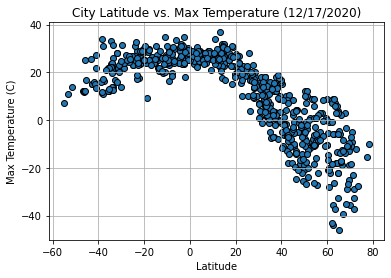

In [21]:
#scatter plot
plt.figure()
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
plt.scatter(x_values, y_values,edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature ({now})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.savefig('../Images/latitude_vs_temp.png')

**Observations**
Latitude and temperature appear to show a negative correlation, i.e., as the distance from the equator (latitude = 0) increases, the maximum temperatures tend to start falling

## Latitude vs. Humidity Plot

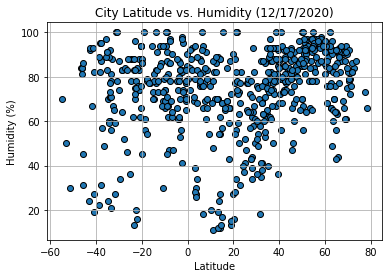

In [22]:
plt.figure()
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]
plt.scatter(x_values, y_values,edgecolor="black")
plt.title(f"City Latitude vs. Humidity ({now})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('../Images/latitude_vs_humidity.png')

**Observations**:
Humidity and Latitude do not appear to have any correlation, as indicated by the scatter plot data, which is largely dispersed

## Latitude vs. Cloudiness Plot

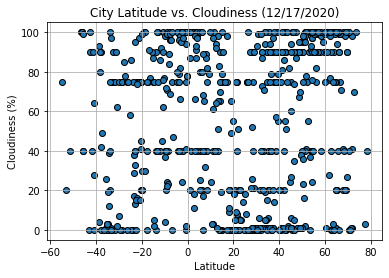

In [24]:
plt.figure()
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]
plt.scatter(x_values, y_values,edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness ({now})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('../Images/latitude_vs_cloud.png')

**Observations:**
Cloudiness and Latitude do not seem to have any correlation 

## Latitude vs. Wind Speed Plot

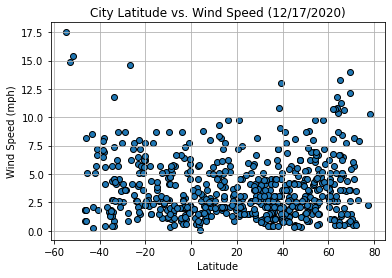

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure()
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]
plt.scatter(x_values, y_values,edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed ({now})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()
plt.savefig('../Images/latitude_vs_wind.png')

**Observations:** 
* Wind speed appears to be negatively correlated with latitude - as latitude increases, i.e. as we move further away from the equator, wind speed seems to decrease and is largely clustered between 0-5 mph
* However, a few outliers are also observed in the data above

## Linear Regression

In [30]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#Southern Hemisphere (less than 0 degrees latitude)
northern = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern = clean_city_data.loc[clean_city_data["Lat"] < 0]
#northern has 422 rows
#southern has 194 rows

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7184291461199096


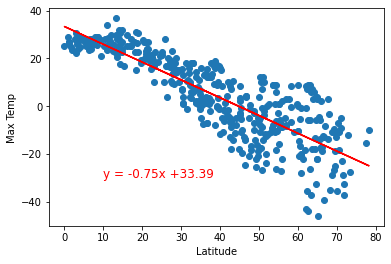

In [31]:
plt.figure()
x_north = northern["Lat"]
y_north = northern["Max Temp"]

# Linear regression on max temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)

# Get regression values
regress_values = x_north * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_north, y_north)
plt.plot(x_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,-30),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Save figure
plt.savefig('../Images/latitude_vs_temp_north_regression.png')

**Observations:**
* Temperature and latitude in the northern hemisphere show a negative correlation - as latitude increases, temp drops
* This matches with our earlier hypothesis that temperatures are hotter closer to the equator (latitude = 0)
* R-squared of 0.7, indicates little variability in data, i.e. most of the data fits with our hypothesis

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3353934080979989


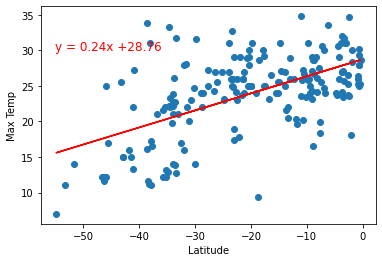

In [34]:
plt.figure()
x_south = southern["Lat"]
y_south = southern["Max Temp"]

# Linear regression on max temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)

# Get regression values
regress_values = x_south * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_south, y_south)
plt.plot(x_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/latitude_vs_temp_south_regression.png')

**Observations:**
* Data for southern hemisphere appears to be more scattered as compared to northern hemisphere. This is also indicated by a lower R-sqared value of 0.33, which shows greater variability of data
* However, the broad trend shows a positive correlation, i.e. higher temperatures closer to the equator and vice-versa 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14458899005495027


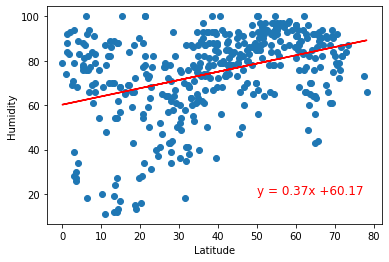

In [36]:
plt.figure()
x_north = northern["Lat"]
y_north = northern["Humidity"]

# Linear regression on humidity vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)

# Get regression values
regress_values = x_north * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_north, y_north)
plt.plot(x_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,20),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/latitude_vs_humidity_north_regression.png')

**Observations:** 
* While the trend line shows a slight positive correlation between humidity and latitude, the scatter plot shows highly dispersed data. A R-squared of 0.14 indicates high variability of data 
* However, a dense cluster of observations can be seen as the latitude increases, i.e. greater humidity between 30-70 degrees of latitude. This could be due to greater landmass in the northern hemisphere as compared to the southern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03365503004302994


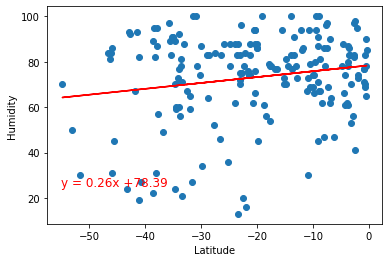

In [38]:
plt.figure()
x_south = southern["Lat"]
y_south = southern["Humidity"]

# Linear regression on Humidity vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)

# Get regression values
regress_values = x_south * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_south, y_south)
plt.plot(x_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,25),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/latitude_vs_humidity_south_regression.png')

**Observations:** 
* In the southern hemisphere, the regression line appears to be almost flat, with a low R-squared value and highly dispersed data, indicating no significant correlation between humidity and latitude
* However, similar data in the northern hemisphere showed a slight positive correlation, which could be owing to greater landmass in the northern hemisphere as opposed to the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02400158407159126


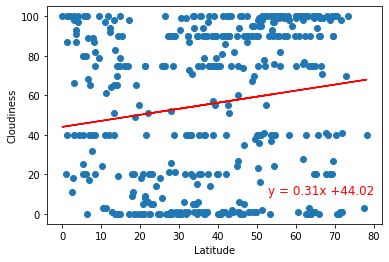

In [40]:
plt.figure()
x_north = northern["Lat"]
y_north = northern["Cloudiness"]

# Linear regression on Cloudiness vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)

# Get regression values
regress_values = x_north * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_north, y_north)
plt.plot(x_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(53,10),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/lat_vs_cloudiness_north_regression.png')

**Observations:**
There seems to be no correlation between cloudiness and latitude in the northern hemisphere, with R-squared close to zero at 0.02

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07392717708728393


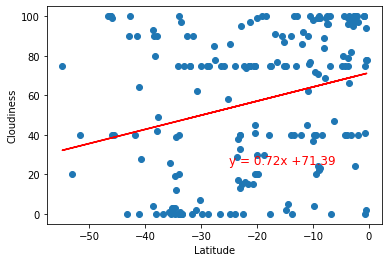

In [41]:
plt.figure()
x_south = southern["Lat"]
y_south = southern["Cloudiness"]

# Linear regression on Cloudiness vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)

# Get regression values
regress_values = x_south * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_south, y_south)
plt.plot(x_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-25,25),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/lat_vs_cloud_south_regression.png')

**Observations:** 
* There is high dispersion/variability of the data, as indicated in the scatter plot
* However, the upward slope of the regression line indicates that despite the variability, cloudiness may increase as we move closer to the equator in the southern hemisphere
* Since published studies have not established any relationship between cloudiness and latitudinal position, this could be an anomaly

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0387653643764344


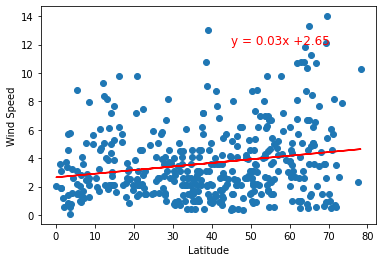

In [43]:
plt.figure()
x_north = northern["Lat"]
y_north = northern["Wind Speed"]

# Linear regression on Wind Speed vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)

# Get regression values
regress_values = x_north * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_north, y_north)
plt.plot(x_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(45,12),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('../Images/lat_vs_wind_north_regression.png')

**Observations:** 
* In the northern hemisphere, data shows a slight positive correlation between distance from the equator and wind speed. However, a low R-squared indicates high variability of data to be able to draw meaningful conclusions

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08107793218961278


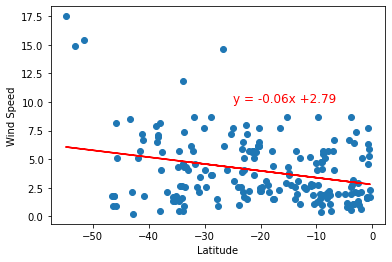

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure()
x_south = southern["Lat"]
y_south = southern["Wind Speed"]

# Linear regression on Wind Speed vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)

# Get regression values
regress_values = x_south * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_south, y_south)
plt.plot(x_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-25,10),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#Save figure
plt.savefig('../Images/latitude_vs_wind_south_regression.png')

**Observations:** 
* Correlation between wind speed and latitude show a similar trend in the southern hemisphere as in the north
* While the trend line shows a negative relationship, the conclusion remains the same - wind speed lowers as we move closer to the equator